In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import sys


np.set_printoptions(threshold=sys.maxsize)

In [3]:
billboard = pd.read_csv(r'C:\Users\kalbrecht\Desktop\Final Project\final.csv')
billboard_df = billboard
billboard_df.columns

Index(['URI', 'Artist', 'Song', 'Release Date', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Loudness', 'Speechiness',
       'Tempo', 'Valence', 'Duration (ms)', 'WH', 'War?', 'Decade'],
      dtype='object')

In [4]:
billboard_df.head()

,URI,Artist,Song,Release Date,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Loudness,Speechiness,Tempo,Valence,Duration (ms),WH,War?,Decade
0,spotify:track:1fhLgOJgIIZEsWWffk8ljs,The Weavers,Goodnight Irene,1950,13,0.832,0.367,0.261,0.000000,-10.404,0.0289,140.820,0.576,202240,D,War,1950
1,spotify:track:5dae01pKNjRQtgOeAkFzPY,Nat King Cole,Mona Lisa,1950,51,0.948,0.251,0.225,0.000000,-12.125,0.0347,166.320,0.324,194987,D,War,1950
2,spotify:track:68GJRIs9vkHFy9l0Sbdsix,Various Artists,The Third Man (The Harry Lime Theme),1950,12,0.911,0.473,0.161,0.909000,-17.505,0.0328,131.775,0.364,149964,D,War,1950
3,spotify:track:33FdwvfiSBRbE2AQ4UehaR,Bing Crosby,Play A Simple Melody - Single Version,1950,10,0.771,0.630,0.222,0.000002,-13.740,0.0522,138.497,0.778,175693,D,War,1950
4,spotify:track:68ZOKozM9xmlp1iwaQSwY7,Teresa Brewer,Music! Music! Music!,1950,26,0.688,0.761,0.448,0.000019,-14.350,0.0402,99.078,0.928,162400,D,War,1950


In [5]:
X = billboard_df[['Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Loudness', 'Speechiness',
       'Tempo', 'Valence', 'Duration (ms)']]
y = billboard_df["Release Date"].values.reshape(-1, 1)
print(X.shape, y.shape)
X.shape

(547, 10) (547, 1)


(547, 10)

In [6]:
# For linear regression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.655456853701242
Testing Score: 0.7081432704068881


Text(0.5, 1.0, 'Residual Plot')

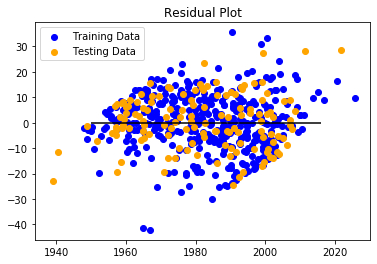

In [9]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [10]:
import pickle

pkl_filename = "spotify_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    spotify_model = pickle.load(file)

In [11]:
from sklearn.externals import joblib
joblib.dump(model, 'decade_model.pkl') 

C:\Users\kalbrecht\Anaconda\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['decade_model.pkl']

In [12]:
with open('decade_model.pkl', 'rb') as f:
    model = joblib.load(f)